In [1]:
import sys
sys.path.append("../data/saved_models/")
sys.path.append("../model_scripts/")
sys.path.append("../utils/")
import os
import json

import numpy as np
import torch
from scipy import stats

import matplotlib.pyplot as plt
import fig2_align_plots

import fig2_align_analysis as rnn
import basic_analysis as basic
import model_utils
import dim_alignment as dim
from task import generate_batch

In [2]:
# file paths
data_folder = f"../data/saved_models/1d_2map/"
save_folder = f"../figures/fig2_align_plots/"

if os.path.isdir(save_folder):
    print('save folder exists')
else:
    os.mkdir(save_folder)

save folder exists


In [3]:
# get the model IDs for all saved models
model_IDs = os.listdir(data_folder)

# select example model
ex_id = 0
model_ID = model_IDs[ex_id]

In [4]:
# get sample rnn data
inputs, outputs, targets = model_utils.sample_rnn_data(data_folder, model_ID)
X, map_targ, pos_targ = model_utils.format_rnn_data(outputs["hidden_states"],\
                                                    targets["map_targets"],\
                                                    targets["pos_targets"])

In [5]:
''' are the position outputs orthogonal? '''
n_models = len(model_IDs)

pos_out_angle = np.zeros(n_models)
for i, m_id in enumerate(model_IDs):
    # get the model weights
    model, _, _ = model_utils.load_model_params(data_folder, model_ID)
    pos_out_w = model.readout_layer_pos.weight
    pos_out_w = pos_out_w.detach().numpy().T
    
    # angle between output weights
    pos_out_angle[i] = dim.cosine_sim(pos_out_w[:, 0], pos_out_w[:, 1])
    
avg_angle = np.rad2deg(np.arccos(np.abs(np.mean(pos_out_angle))))
print(f'the avg angle between position outputs is {int(avg_angle)} deg.')

the avg angle between position outputs is 88 deg.


model 1 of 15
model 2 of 15
model 3 of 15
model 4 of 15
model 5 of 15
model 6 of 15
model 7 of 15
model 8 of 15
model 9 of 15
model 10 of 15
model 11 of 15
model 12 of 15
model 13 of 15
model 14 of 15
model 15 of 15
mean W * xi = 9.23e-06
s.e.m. W * xi = 1.63e-05


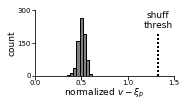

In [6]:
''' Figure 2C: comparison of the true and ideal remap vectors '''
f, ax = fig2_align_plots.plot_c(data_folder, model_IDs)
f.savefig(f'{save_folder}remap_vectors.png', dpi=600, bbox_inches='tight')
plt.show()

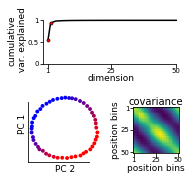

In [8]:
''' Figure 2D: example showing the geometry of the remap vectors '''
f = fig2_align_plots.plot_d(data_folder, model_ID)
f.savefig(f'{save_folder}remap_dims.png', dpi=600, bbox_inches='tight')
plt.show()